## Random bidding strategy 2: testing ranges around the mean

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [2]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [3]:
#Starting point is the mean of the clicked impressions pay price
constantPriceUp = 55
constantPriceDown = 50
bidPriceListUpperBound = []
bidPriceListLowerBound = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < 40):
    constantPriceUp +=1
    bidPriceListUpperBound.append(constantPriceUp)
    constantPriceDown +=1
    bidPriceListLowerBound.append(constantPriceDown)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []
spentBudget = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceListUpperBound)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(bidPriceListLowerBound[j],bidPriceListUpperBound[j],1)
        randomBids.append(bid)
    
    #rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (randomBids[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/(1000)):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    consumedBudget = 6250 - budget
    ctr = (clicks/bids)*100    
    cpm = ((consumedBudget)/bids)*1000
    cpc = (consumedBudget)/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceListUpperBound[j])
    print(bidPriceListLowerBound[j])
    numberBids.append(impressions)
    #print(numberBids)
    wonBids.append(bids)
    #print(wonBids)
    CTR.append(ctr)
    #print(CTR)
    numberClicks.append(clicks)
    #print(numberClicks)
    CPC.append(cpc)
    #print(CPC)
    CPM.append(cpm)
    #print(CPM)
    spentBudget.append(consumedBudget)    

Output
56
51
Output
57
52
Output
58
53
Output
59
54
Output
60
55
Output
61
56
Output
62
57
Output
63
58
Output
64
59
Output
65
60
Output
66
61
Output
67
62
Output
68
63
Output
69
64
Output
70
65
Output
71
66
Output
72
67
Output
73
68
Output
74
69
Budget is spent!
Output
75
70
Budget is spent!
Output
76
71
Budget is spent!
Output
77
72
Budget is spent!
Output
78
73
Budget is spent!
Output
79
74
Budget is spent!
Output
80
75
Budget is spent!
Output
81
76
Budget is spent!
Output
82
77
Budget is spent!
Output
83
78
Budget is spent!
Output
84
79
Budget is spent!
Output
85
80
Budget is spent!
Output
86
81
Budget is spent!
Output
87
82
Budget is spent!
Output
88
83
Budget is spent!
Output
89
84
Budget is spent!
Output
90
85
Budget is spent!
Output
91
86
Budget is spent!
Output
92
87
Budget is spent!
Output
93
88
Budget is spent!
Output
94
89
Budget is spent!
Output
95
90


In [4]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'Constant bid price': bidPriceListUpperBound,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
    'Budget spent': spentBudget,
})
print(summaryStatistics)

    Budget spent        CPM       CTR  Clicks  Constant bid price        eCPC  \
0       3437.908  28.384313  0.038804      47                  56   73.146979   
1       3622.595  29.079164  0.039333      49                  57   73.930510   
2       3793.634  29.695998  0.037574      48                  58   79.034042   
3       3939.037  30.209887  0.037580      49                  59   80.388510   
4       4075.758  30.679629  0.036884      49                  60   83.178735   
5       4234.747  31.211284  0.036114      49                  61   86.423408   
6       4329.645  31.532358  0.035686      49                  62   88.360102   
7       4430.535  31.871372  0.035968      50                  63   88.610700   
8       4528.061  32.195653  0.037684      53                  64   85.435113   
9       4624.275  32.513570  0.037265      53                  65   87.250472   
10      4725.873  32.848445  0.036839      53                  66   89.167415   
11      4809.180  33.122671 

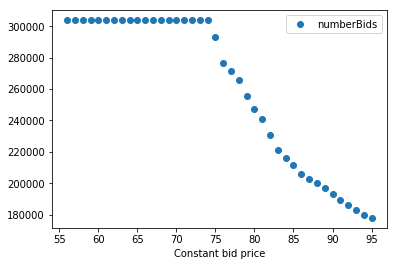

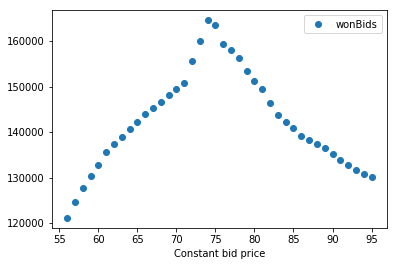

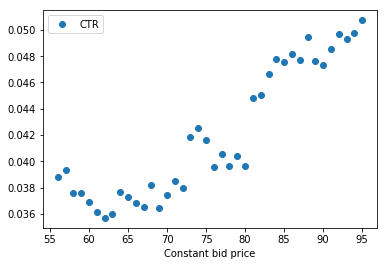

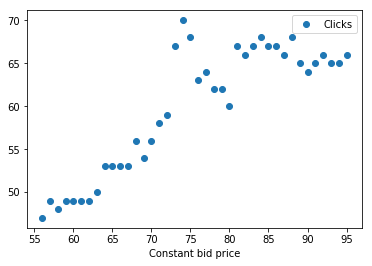

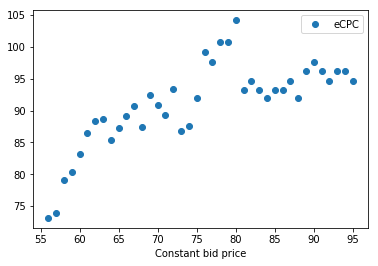

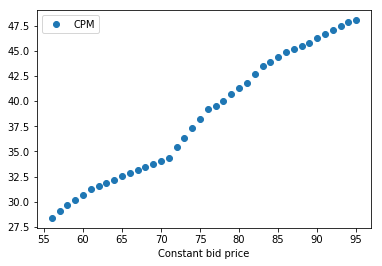

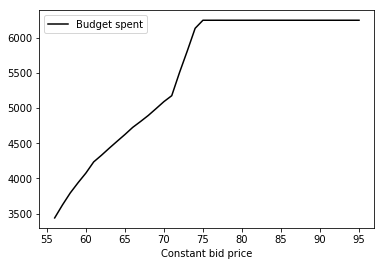

In [5]:
summaryStatistics.plot(x='Constant bid price', y='numberBids', style='o'); summaryStatistics.plot(x='Constant bid price', y='wonBids', style='o')
summaryStatistics.plot(x='Constant bid price', y='CTR', style='o')
summaryStatistics.plot(x='Constant bid price', y='Clicks', style='o')
summaryStatistics.plot(x='Constant bid price', y='eCPC', style='o')
summaryStatistics.plot(x='Constant bid price', y='CPM', style='o')
summaryStatistics.plot(x='Constant bid price', y='Budget spent', color = "black")

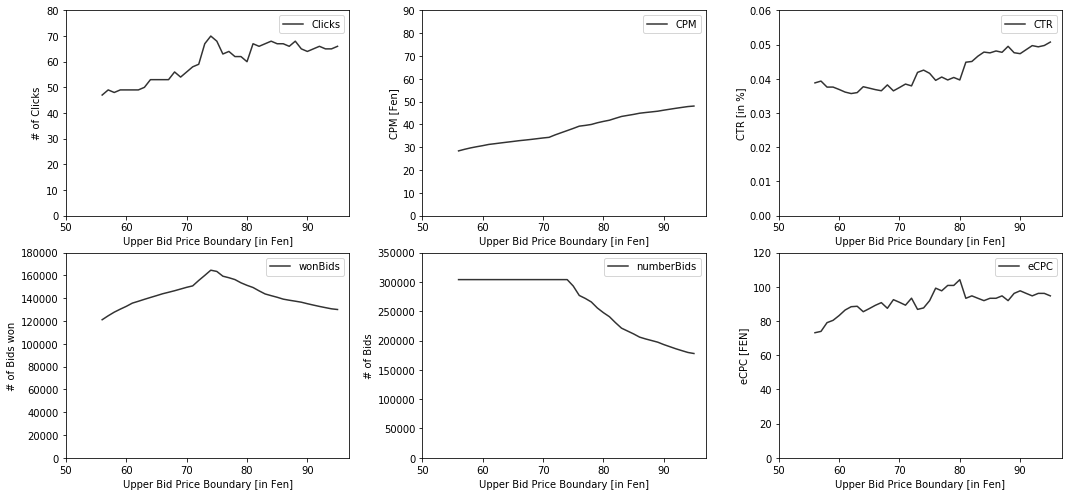

In [6]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(15,7) )

ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='black', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax1.set_xticks(np.arange(50,100,10))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='black', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax2.set_xticks(np.arange(50,100,10))
ax2.set_yticks(np.arange(0,100,10))
ax2.set_ylim(top=90)

ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='black', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax3.set_xticks(np.arange(50,100,10))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.06)

ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='black', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax4.set_xticks(np.arange(50,100,10))
ax4.set_yticks(np.arange(0,190000,20000))
ax4.set_ylim(top=180000)

ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='black', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax5.set_xticks(np.arange(50,100,10))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='black', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Upper Bid Price Boundary [in Fen]')
ax6.set_xticks(np.arange(50,100,10))
ax6.set_yticks(np.arange(0,210,20))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=120)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBidsRandom.pdf',bbox_inches='tight')